1. Reading the Dataset


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import warnings
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
warnings.filterwarnings('ignore')

In [52]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']

In [53]:
train = pd.read_csv("twitter_training.csv",names=col_names)
train.sample(5)

,ID,Entity,Sentiment,Content
65443,6807,johnson&johnson,Positive,"I'm buying shares in Johnson & Johnson, oil sa..."
14514,2887,Dota2,Irrelevant,Best funny Dota 2 moment and you laugh!!!!!!! ...
72874,8883,Nvidia,Positive,com We have the @nvidia Shield TV Pro Beta and...
3832,1862,CallOfDutyBlackopsColdWar,Neutral,the bigger problem was demo saving ( bo4 esp )...
35708,8131,Microsoft,Positive,"Whoever created the ""undo"" button on Microsoft..."


In [54]:
test = pd.read_csv("twitter_validation.csv",names=col_names)
test.sample(5)

,ID,Entity,Sentiment,Content
4,4433,Google,Neutral,Now the President is slapping Americans in the...
407,5212,Hearthstone,Positive,I do like this hearthstone pic.twitter.com/ef2...
84,7342,LeagueOfLegends,Positive,this is the absolute FUNNIEST interaction I’ve...
796,4471,Google,Negative,@Google and @Apple can you explain promoting a...
627,6280,FIFA,Neutral,FUT’s menu stuff this year is the best it has ...


In [55]:
train.shape

(74682, 4)

2. Data Preprocessing.

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Content    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [57]:
# checking null values
train.isnull().sum()

ID             0
Entity         0
Sentiment      0
Content      686
dtype: int64

In [58]:
train.dropna(subset=['Content'], inplace=True)

In [59]:
# checking duplicate values
train.duplicated().sum()

2340

In [60]:
# replacing irrelavant with neutral
train['Sentiment'] = train['Sentiment'].replace('Irrelevant', 'Neutral')
test['Sentiment'] = test['Sentiment'].replace('Irrelevant', 'Neutral')

In [61]:
train.head()

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [62]:
# checking duplicate values
train.duplicated().sum()

2340

In [63]:
# dropping duplicates
train = train.drop_duplicates(keep='first')

In [64]:
train.duplicated().sum()

0

In [65]:
train.shape

(71656, 4)

In [66]:
train.head()

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


3. Exploratory Data Analysis (EDA)

---



In [67]:
train['Sentiment'].value_counts()

Neutral     30245
Negative    21698
Positive    19713
Name: Sentiment, dtype: int64

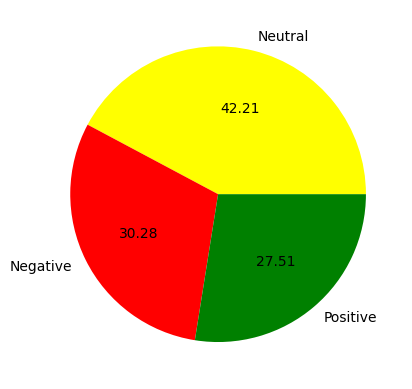

In [68]:
plt.pie(train['Sentiment'].value_counts(), labels=['Neutral','Negative','Positive'],autopct='%0.2f',colors=['yellow','red','green'])
plt.show()

In [69]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [70]:
train['num_char'] = train['Content'].apply(len) # no of characters of each text

In [71]:
train.head()

,ID,Entity,Sentiment,Content,num_char
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57


In [72]:
# number of words
train['num_words'] = train['Content'].apply(lambda x: len(nltk.word_tokenize(x)))

In [73]:
train.head()

,ID,Entity,Sentiment,Content,num_char,num_words
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53,11
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,13
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,11
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51,11
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57,13


In [74]:
# number of sentences
train['num_sentences'] = train['Content'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [75]:
train.head()

,ID,Entity,Sentiment,Content,num_char,num_words,num_sentences
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53,11,1
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,13,1
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,11,1
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51,11,1
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57,13,1


In [76]:
# data description
train[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,71656.000000,71656.000000,71656.000000
mean,110.538127,22.972535,1.954491
std,79.409848,17.163287,1.638269
min,1.000000,0.000000,0.000000
25%,49.000000,10.000000,1.000000
50%,93.000000,19.000000,1.000000
75%,155.000000,32.000000,2.000000
max,957.000000,198.000000,33.000000


<Axes: xlabel='num_char', ylabel='Count'>

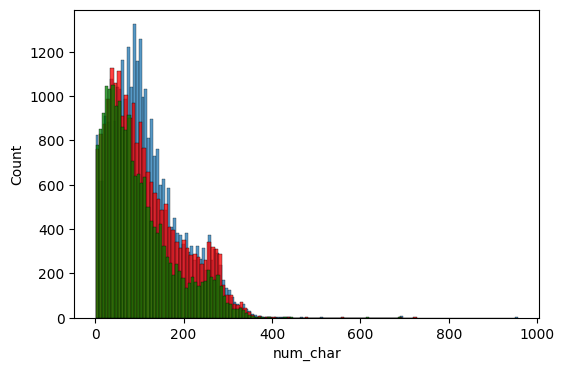

In [77]:
plt.figure(figsize=(6,4))
sns.histplot(train[train['Sentiment'] == 'Neutral']['num_char'])
sns.histplot(train[train['Sentiment'] == 'Negative']['num_char'], color='red')
sns.histplot(train[train['Sentiment'] == 'Positive']['num_char'], color='green')

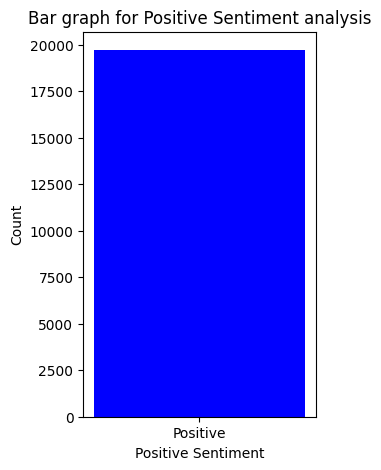

In [78]:
import matplotlib.pyplot as plt
# Filter the DataFrame for 'Positive' sentiments
positive_count = (train['Sentiment'] == 'Positive').sum()

# Create a bar chart for the count of 'Positive' sentiments
plt.figure(figsize=(3, 5))
plt.bar(['Positive'], [positive_count], color='blue')
plt.xlabel('Positive Sentiment')
plt.ylabel('Count')
plt.title('Bar graph for Positive Sentiment analysis')
plt.show()

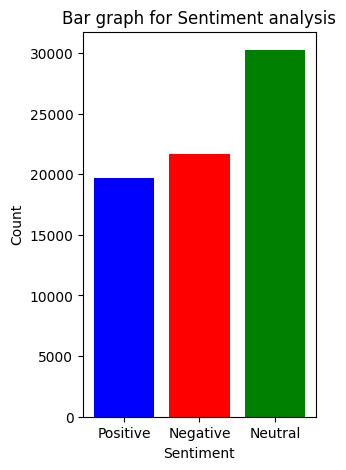

In [79]:
import matplotlib.pyplot as plt
# Filter the DataFrame for 'Positive' sentiments
positive_count = (train['Sentiment'] == 'Positive').sum()
Negative_count= (train['Sentiment'] == 'Negative').sum()
Neutral_count=(train['Sentiment'] == 'Neutral').sum()
plt.figure(figsize=(3, 5))
plt.bar(['Positive'],[positive_count], color='blue')
plt.bar(['Negative'],[Negative_count], color='red')
plt.bar(['Neutral'],[Neutral_count], color='green')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Bar graph for Sentiment analysis')
plt.show()

<Axes: >

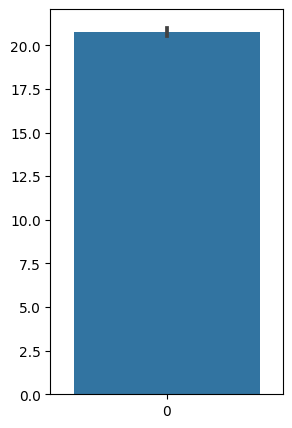

In [80]:
plt.figure(figsize=(3,5))
sns.barplot(train[train['Sentiment']=='Positive']['num_words'])

<Axes: xlabel='num_words', ylabel='Count'>

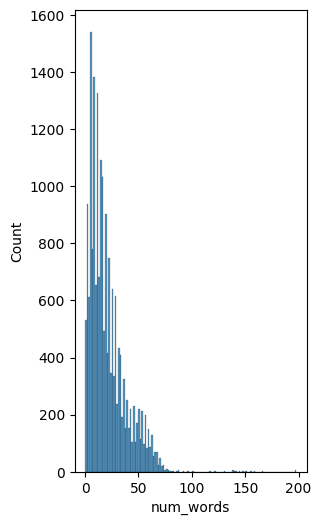

In [81]:
plt.figure(figsize=(3,6))
sns.histplot(train[train['Sentiment']=='Positive']['num_words'])

<Axes: xlabel='num_words', ylabel='Count'>

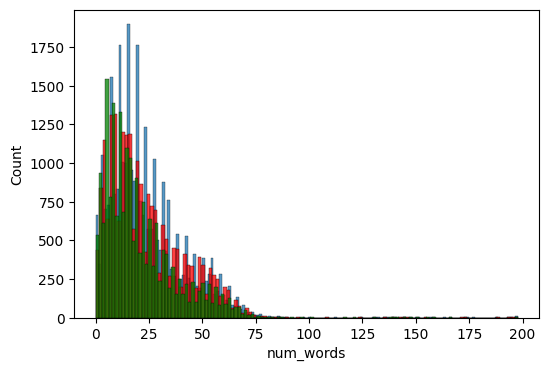

In [82]:
plt.figure(figsize=(6,4))
sns.histplot(train[train['Sentiment'] == 'Neutral']['num_words'])
sns.histplot(train[train['Sentiment'] == 'Negative']['num_words'], color='red')
sns.histplot(train[train['Sentiment'] == 'Positive']['num_words'], color='green')

In [83]:
df=train.drop(['ID','Entity'],axis=1)

In [84]:
df.head()

,Sentiment,Content,num_char,num_words,num_sentences
0,Positive,im getting on borderlands and i will murder yo...,53,11,1
1,Positive,I am coming to the borders and I will kill you...,51,13,1
2,Positive,im getting on borderlands and i will kill you ...,50,11,1
3,Positive,im coming on borderlands and i will murder you...,51,11,1
4,Positive,im getting on borderlands 2 and i will murder ...,57,13,1


In [85]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Sentiment'],drop_first=True)
df_encoded['Sentiment_Neutral'] = df_encoded['Sentiment_Neutral'].astype(int)
df_encoded['Sentiment_Positive'] = df_encoded['Sentiment_Positive'].astype(int)

In [86]:
df_encoded=df_encoded.drop(['Content'],axis=1)

<Axes: >

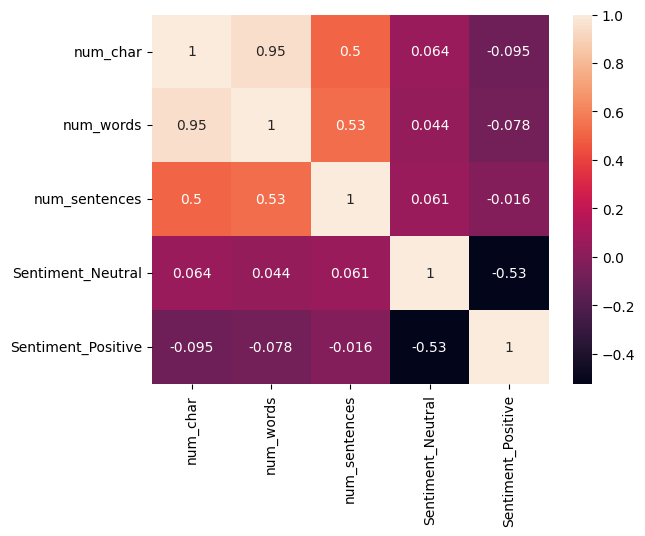

In [87]:
sns.heatmap(df_encoded.corr(),annot=True)

4. Text Preprocessing

In [88]:
from nltk.corpus import stopwords
import string # for punctuation
# string.punctuation
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:] # list is mutable, so you have to do cloning, else if you clear y, text gets cleared too
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [89]:
# Perform Label encoding
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['Sentiment'])

In [90]:
df.head()

,Sentiment,Content,num_char,num_words,num_sentences,sentiment_encoded
0,Positive,im getting on borderlands and i will murder yo...,53,11,1,2
1,Positive,I am coming to the borders and I will kill you...,51,13,1,2
2,Positive,im getting on borderlands and i will kill you ...,50,11,1,2
3,Positive,im coming on borderlands and i will murder you...,51,11,1,2
4,Positive,im getting on borderlands 2 and i will murder ...,57,13,1,2


In [91]:
df.head()

,Sentiment,Content,num_char,num_words,num_sentences,sentiment_encoded
0,Positive,im getting on borderlands and i will murder yo...,53,11,1,2
1,Positive,I am coming to the borders and I will kill you...,51,13,1,2
2,Positive,im getting on borderlands and i will kill you ...,50,11,1,2
3,Positive,im coming on borderlands and i will murder you...,51,11,1,2
4,Positive,im getting on borderlands 2 and i will murder ...,57,13,1,2


In [92]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color='black')

5. Building the Model

In [93]:
df=df.drop(['Sentiment'],axis=1)

In [94]:
y = df['sentiment_encoded'].values

In [95]:
print(y.shape)

(71656,)


In [96]:
from sklearn.model_selection import train_test_split

6. Evaluation

In [97]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

bnb = BernoulliNB()

In [98]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

bnb = BernoulliNB()